# Bioinformatics 

 ### This notebook is a demonstration of a variety of bioinformatics skills as well as software I have written

Step 1: load and clean up data

In [1]:
import pandas as pd
# import VizXpress # TODO: download package
import VizXpress.geo_processing as geo_processing
import VizXpress.heatmap as hm
import VizXpress.violin as violin

In [ ]:
geo_data = geo_processing.get_geo(["GSE113113"])
geo_data

05-Jan-2023 23:34:48 INFO GEOparse - File already exist: using local version.
05-Jan-2023 23:34:48 INFO GEOparse - Parsing ./GSE113113_family.soft.gz: 
05-Jan-2023 23:34:48 DEBUG GEOparse - DATABASE: GeoMiame
05-Jan-2023 23:34:48 DEBUG GEOparse - SERIES: GSE113113
05-Jan-2023 23:34:48 DEBUG GEOparse - PLATFORM: GPL16791
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097075
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097076
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097077
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097078
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097079
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097080
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097081
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097082
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097083
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097084
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM3097085
05-Jan-2023 23:34:48 DEBUG GEOparse - SAMPLE: GSM30

[<SERIES: GSM3097126 - 52 SAMPLES, 1 PLATFORM(s)>]

: 

In [3]:
hdir = '.'
df = pd.read_csv(hdir+'/GSE113113_data_final_from_pub.txt', index_col=0, delimiter='\t')
length = df.shape[1] -3

In [4]:
df

,S15.8147.A1,S15.10848.A,S15.6955.A,S15.7535.A,S15.6746.A,S15.5509.,S15.5295.A1,S15.5295.B1,S15.5506.A,S15.11632.B2,...,S15.8104.C,S15.13213.A2,S15.6546.A1,S15.11353.A2,S15.13213.B1,S16.1596.A1,S16.1854.A2,WD-37320,WD-37322,WD-37323
REFID,,,,,,,,,,,,,,,,,,,,,
AADACL3,0.089497,0.316792,0.301933,0.581711,0.043144,5.618851,0.193193,0.000000,0.031677,1.182917,...,0.000000,0.002192,0.000000,0.000000,0.000000,0.000000,0.220819,0.039440,3.096464,0.000000
AADACL4,0.020189,0.560791,0.861520,0.511841,0.000000,0.404477,0.000000,0.000000,0.000000,1.117292,...,0.000000,0.099853,0.000000,0.000000,0.000000,0.079025,0.347437,0.019985,0.000000,0.000000
ABCA4,0.293484,0.490411,0.717529,0.759325,0.463241,2.197014,0.340839,0.253015,0.380105,0.988917,...,0.158368,0.225187,0.124384,0.255007,0.238558,0.946051,0.358945,0.146157,0.431585,0.128034
ABCB10,3.573865,3.430171,3.334291,3.742058,3.136132,2.985250,3.427370,3.910686,3.327948,3.468880,...,3.476964,3.275262,3.358321,3.474645,3.357521,3.298335,3.318741,2.766741,2.939964,3.115131
ABCD3,3.656189,3.835917,4.078466,3.610176,3.741622,5.011230,4.014064,3.619868,4.457393,4.132651,...,4.459452,3.725688,5.365612,4.936976,4.129612,4.792392,3.667229,4.573520,4.373261,4.134075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF280A,0.035830,0.120706,0.422346,0.443765,0.000000,0.000000,0.000000,0.000000,0.059173,0.867076,...,0.134945,0.000000,0.000000,0.100463,0.000000,0.000000,0.549726,0.143447,0.086308,0.000000
ZNF280B,1.355266,1.101054,0.914376,1.308088,1.238995,0.307930,0.366376,0.438446,0.478243,1.249032,...,0.401655,1.370369,0.254697,0.233904,1.208447,0.572478,0.664556,0.435888,0.230632,0.614371
ZNF70,1.967408,2.011712,1.911503,1.289383,2.582887,2.177936,2.675588,1.984559,2.363170,2.292433,...,1.887297,2.450782,1.382261,1.700715,2.294565,2.278201,2.433312,2.289647,2.520351,2.560764


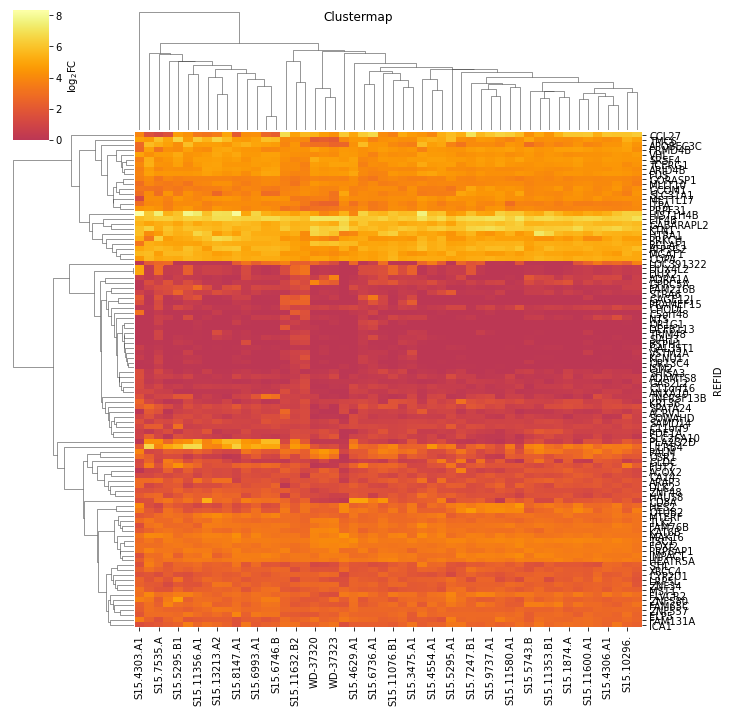

In [24]:
hm.sns_clustermap(df.sample(100))

In [18]:

coldict = dict(zip(df.columns[:-3],['disease']*len(df.columns[:-3])))
coldict.update(dict(zip(df.columns[-3:],['healthy']*len(df.columns[-3:]))))
coldict

{'S15.8147.A1': 'disease',
 'S15.10848.A': 'disease',
 'S15.6955.A': 'disease',
 'S15.7535.A': 'disease',
 'S15.6746.A': 'disease',
 'S15.5509.': 'disease',
 'S15.5295.A1': 'disease',
 'S15.5295.B1': 'disease',
 'S15.5506.A': 'disease',
 'S15.11632.B2': 'disease',
 'S15.6993.A1': 'disease',
 'S15.11356.A1': 'disease',
 'S15.4303.A1': 'disease',
 'S15.4554.A1': 'disease',
 'S15.6746.B': 'disease',
 'S15.10296.': 'disease',
 'S15.9248.A1': 'disease',
 'S15.3475.A1': 'disease',
 'S15.11632.A2': 'disease',
 'S15.4629.A1': 'disease',
 'S15.4306.A1': 'disease',
 'S15.4786.A1': 'disease',
 'S15.4787.A1': 'disease',
 'S15.5743.A': 'disease',
 'S15.5741.A6': 'disease',
 'S15.6736.A1': 'disease',
 'S15.7535.B': 'disease',
 'S15.11580.A1': 'disease',
 'S15.11601.A2': 'disease',
 'S15.7247.B1': 'disease',
 'S15.9737.A1': 'disease',
 'S15.9737.B1': 'disease',
 'S15.5029.A': 'disease',
 'S15.5029.B': 'disease',
 'S15.11353.B1': 'disease',
 'S15.12439.': 'disease',
 'S15.12438.B1': 'disease',
 'S15.1

<AxesSubplot:xlabel='ZNF280B', ylabel='Expression (log2 Fold Change)'>

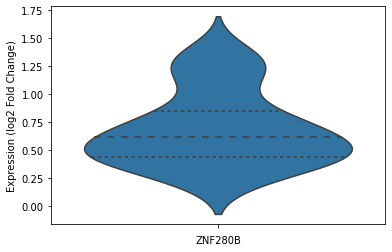

In [23]:
violin.violin_plot(df, cols=coldict, genes='ZNF280B')
